Business Problem Statement – Customer Segmentation
In today’s competitive retail market, understanding customer behavior is essential for effective marketing strategies and business growth.
A retail company wants to improve its customer targeting and personalized marketing campaigns. Currently, all customers receive similar promotional offers, leading to low conversion rates and wasted marketing budget.

The company has collected customer demographic and behavioral data, including Annual Income, Spending Score, and Age. However, this data is not being utilized to segment customers into distinct groups based on purchasing behavior.

Goal:
Use clustering techniques (K-Means) to segment customers into meaningful groups so that:

High-value customers can be targeted with loyalty programs.

Low-spending customers can be incentivized to spend more.

Marketing resources can be allocated efficiently to the right customer segments.

Expected Outcome:
A clear segmentation of customers with labels (e.g., “High Income – High Spending”, “Low Income – Low Spending”) and actionable business insights to guide marketing, pricing, and retention strategies.

Steps to solve the problem : - 

1. Import Libraries & Dataset (Mall Customers dataset – I can provide a sample).

2. Data Exploration (check structure, null values, basic stats).

3. Feature Selection (Annual Income & Spending Score or more if needed).

4. Data Preprocessing (scaling).

5. K-Means Clustering (find optimal clusters using Elbow method).

6. Model Training.

7. Visualization (scatter plots with clusters).

8. Insights & Interpretation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
en = LabelEncoder()
en.fit(dataset['Gender'])

LabelEncoder()

In [8]:
dataset['Gender'] = en.transform(dataset['Gender'])

In [9]:
dataset['Gender'].unique()

array([1, 0])

In [10]:
en.classes_

array(['Female', 'Male'], dtype=object)

In [11]:
mapping = dict(zip(en.classes_, range(len(en.classes_))))
mapping

{'Female': 0, 'Male': 1}

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


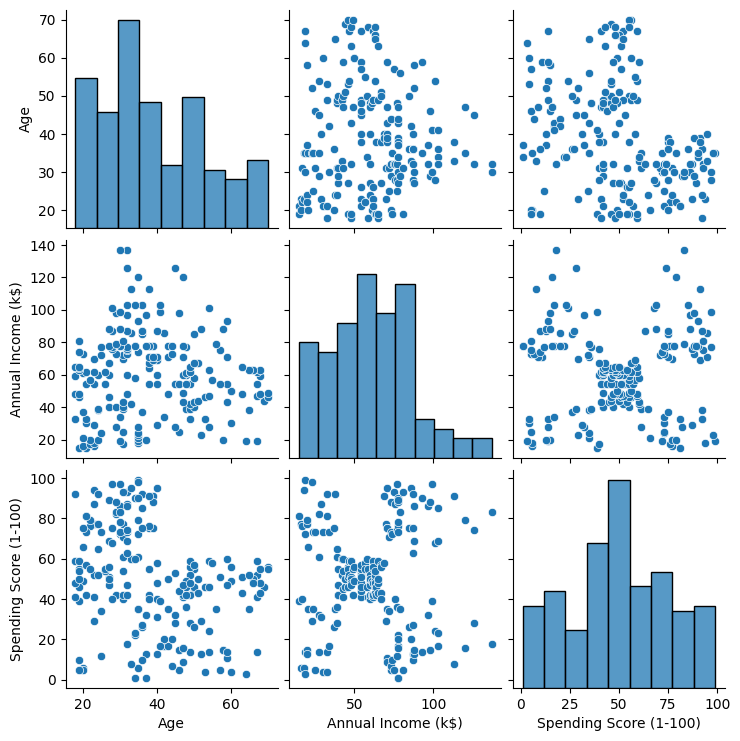

In [13]:
sns.pairplot(dataset[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [14]:
dataset[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [15]:
x = dataset[['Annual Income (k$)','Spending Score (1-100)']]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [18]:
x_scaled = ss.transform(x)
new_dataset = pd.DataFrame({'Annual Income (k$)':x_scaled[:,0],'Spending Score (1-100)':x_scaled[:,1]})
new_dataset.head(3)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters = i,init = 'k-means++')
    km.fit(new_dataset)
    wcss.append(km.inertia_)

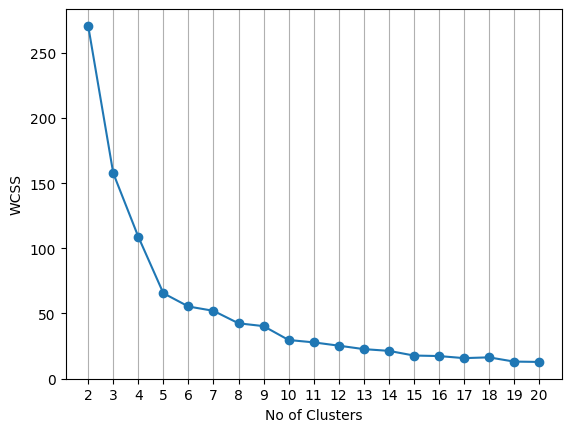

In [21]:
plt.plot(list(range(2,21)),wcss,marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.xticks(list(range(2,21)))
plt.grid(axis = 'x')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
for i in range(2,11):
    km = KMeans(n_clusters = i,init = 'k-means++')
    km.fit(new_dataset)
    print(i,silhouette_score(new_dataset,labels = km.labels_))

2 0.3619396289796577
3 0.46658474419000145
4 0.44315291094300135
5 0.5539423799434205
6 0.5394911417553498
7 0.45254829839942134
8 0.5051794889504587
9 0.4570853966942764
10 0.4427611772821541


In [50]:
km = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
new_dataset['Predicted Categories'] = km.fit_predict(new_dataset)

In [51]:
new_dataset.head(5)

,Annual Income (k$),Spending Score (1-100),Predicted Categories
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,2


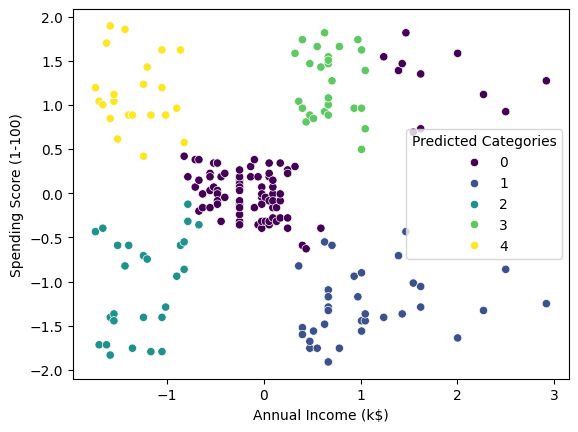

In [52]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue = 'Predicted Categories',data = new_dataset,palette='viridis')
plt.show()

In [53]:
new_dataset['Predicted Categories'].unique()

array([2, 4, 0, 3, 1], dtype=int32)

In [54]:
dataset['Categories'] = new_dataset['Predicted Categories']

In [55]:
print(dataset.groupby('Categories')[['Annual Income (k$)','Spending Score (1-100)']].mean())

            Annual Income (k$)  Spending Score (1-100)
Categories                                            
0                    62.568182               53.965909
1                    88.200000               17.114286
2                    28.444444               24.185185
3                    78.035714               81.892857
4                    25.727273               79.363636


In [56]:
dataset[['Annual Income (k$)','Spending Score (1-100)']].describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Conclusion & Business Insights
The K-Means clustering model segmented customers into 5 distinct groups based on Annual Income and Spending Score:

Cluster	Average Income	Average Spending Score	                  Segment Name	                           Business Interpretation
0	         62.57	                   53.96	          Moderate Income – Moderate Spending	       Balanced customers with average income and                                                                                                              spending. 
                                                                                                       Stable group, may respond to seasonal promotions.

1	         88.20	                   17.11	          High Income – Very Low Spending	           Wealthy customers who spend very little. 
                                                                                                       Potential untapped revenue — need targeted                                                                                                              offers or premium experiences to encourage                                                                                                              spending.

2	         28.44	                   24.18	          Very Low Income – Very Low Spending	       Price-sensitive customers with low purchasing                                                                                                           power. 
                                                                                                       Focus on low-cost products, discounts, or                                                                                                               budget-friendly bundles.

3	         78.03	                   81.89	          High Income – High Spending	               Most valuable customers. Should be retained with                                                                                                        loyalty programs, exclusive offers, and                                                                                                                 personalized service.

4	         25.72	                   79.36	          Very Low Income – High Spending	           Low income but high spending behavior. 
                                                                                                       Could be impulsive buyers — can be engaged with                                                                                                         frequent small promotions or bundle offers.
